# Sandbox for testing NYT API functionality 

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()

nyt_api_key = os.getenv("NYT_API_KEY")
client_secret = os.getenv("NYT_CLIENT_SECRET")

def mask(s):
    if not s:
        return None
    return s[:4] + "..." + s[-4:]

print("NYT_API_KEY loaded:", nyt_api_key is not None)
print("NYT_API_KEY (masked):", mask(nyt_api_key))
print("NYT Client Secret loaded:", client_secret is not None)
print("NYT Client Secret (masked):", mask(client_secret))

NYT_API_KEY loaded: True
NYT_API_KEY (masked): YGTe...qJia
NYT Client Secret loaded: True
NYT Client Secret (masked): SQZ3...045O


In [6]:
import requests

NYT_BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

def search_nyt_taylor_swift(api_key: str, page: int = 0):
    """
    Simple test: search for 'Taylor Swift' articles.
    Returns raw response JSON.
    """
    params = {
        "q": "Taylor Swift",
        "api-key": api_key,
        "page": page,  # each page is 10 results
    }
    r = requests.get(NYT_BASE_URL, params=params, timeout=15)
    r.raise_for_status()
    return r.json()

In [7]:
nyt_data = search_nyt_taylor_swift(nyt_api_key, page=0)
type(nyt_data), nyt_data.keys()

(dict, dict_keys(['status', 'copyright', 'response']))

In [8]:
docs = nyt_data["response"]["docs"]
len(docs)

10

In [9]:
first = docs[0]
first["headline"]["main"], first["pub_date"]

('Anticipating Taylor Swift’s ‘The Life of a Showgirl’',
 '2025-08-18T09:03:25Z')

In [10]:
for d in docs[:3]:
    print(d["pub_date"], "–", d["headline"]["main"])

2025-08-18T09:03:25Z – Anticipating Taylor Swift’s ‘The Life of a Showgirl’
2025-09-11T09:00:11Z – Stephanie Burt on Taylor Swift and Some Other Favorite Geniuses
2025-10-04T17:20:12Z – In Taylor’s Version, Ophelia Has a Fairy-Tale Ending


## Testing SpotifyClient

In [7]:
from importlib import reload
import ts_media_bridge

reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
ts = sp.get_artist("06HL4z0CvFAxyc27GXpf02")  # Taylor Swift
ts["name"], ts["followers"]["total"], ts["popularity"]


('Taylor Swift', 147460505, 100)

In [ ]:
# Getting Taylor Swift's Albums 

In [26]:
import pandas as pd

artist_id = "06HL4z0CvFAxyc27GXpf02"   # Taylor Swift

albums = sp.get_artist_albums(
    artist_id,
    include_groups="album,single,compilation,appears_on"
)

print(f"Total raw albums returned: {len(albums)}")

# Normalize nested JSON into a DataFrame
df_albums = pd.json_normalize(albums)

df_albums = df_albums[[
    "id",
    "name",
    "album_type",
    "total_tracks",
    "release_date",
    "release_date_precision",
    "artists",
    "external_urls.spotify"
]]

df_albums.head()

Total raw albums returned: 206


,id,name,album_type,total_tracks,release_date,release_date_precision,artists,external_urls.spotify
0,6QNMhoV8V0u7cFuhhUBOn7,The Life of a Showgirl + Acoustic Collection,album,19,2025-11-07,day,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/6QNMhoV8V0u7cFu...
1,4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,album,12,2025-10-03,day,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/4a6NzYL1YHRUgx9...
2,4tFsJC9jQ0Qjj7HSExhAdm,The Life of a Showgirl (Track by Track Version),album,26,2025-10-02,day,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/4tFsJC9jQ0Qjj7H...
3,5H7ixXZfsNMGbIE5OBSpcb,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,album,31,2024-04-19,day,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/5H7ixXZfsNMGbIE...
4,1Mo4aZ8pdj6L1jx8zSwJnt,THE TORTURED POETS DEPARTMENT,album,16,2024-04-18,day,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/1Mo4aZ8pdj6L1jx...


In [21]:
# Testing new methods in notebook 

from importlib import reload
import ts_media_bridge

reload(ts_media_bridge)
from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(
    TS_ID,
    include_groups="album,single,compilation,appears_on"
)

df_albums.head(), df_albums.shape

(                       id                                             name  \
 0  6QNMhoV8V0u7cFuhhUBOn7     The Life of a Showgirl + Acoustic Collection   
 1  4a6NzYL1YHRUgx9e3YZI6I                           The Life of a Showgirl   
 2  4tFsJC9jQ0Qjj7HSExhAdm  The Life of a Showgirl (Track by Track Version)   
 3  5H7ixXZfsNMGbIE5OBSpcb     THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   
 4  1Mo4aZ8pdj6L1jx8zSwJnt                    THE TORTURED POETS DEPARTMENT   
 
   album_type  total_tracks release_date release_date_precision  \
 0      album            19   2025-11-07                    day   
 1      album            12   2025-10-03                    day   
 2      album            26   2025-10-02                    day   
 3      album            31   2024-04-19                    day   
 4      album            16   2024-04-18                    day   
 
                                external_urls.spotify  
 0  https://open.spotify.com/album/6QNMhoV8V0u7cFu...  
 1  http

In [23]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge

reload(ts_media_bridge)
from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"


In [31]:
df_albums = sp.get_artist_albums_df(
    TS_ID,
    include_groups="album,single,compilation,appears_on"
)

df_albums.head(), df_albums.shape

(                       id                                             name  \
 0  6QNMhoV8V0u7cFuhhUBOn7     The Life of a Showgirl + Acoustic Collection   
 1  4a6NzYL1YHRUgx9e3YZI6I                           The Life of a Showgirl   
 2  4tFsJC9jQ0Qjj7HSExhAdm  The Life of a Showgirl (Track by Track Version)   
 3  5H7ixXZfsNMGbIE5OBSpcb     THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   
 4  1Mo4aZ8pdj6L1jx8zSwJnt                    THE TORTURED POETS DEPARTMENT   
 
   album_type  total_tracks release_date release_date_precision  popularity  \
 0      album            19   2025-11-07                    day          77   
 1      album            12   2025-10-03                    day         100   
 2      album            26   2025-10-02                    day          70   
 3      album            31   2024-04-19                    day          85   
 4      album            16   2024-04-18                    day          82   
 
           label genres                         

In [28]:
df_albums.columns.tolist()


['id',
 'name',
 'album_type',
 'total_tracks',
 'release_date',
 'release_date_precision',
 'artists',
 'external_urls.spotify']

In [32]:
df_albums[["name", "release_date", "popularity", "label"]].head(10)


,name,release_date,popularity,label
0,The Life of a Showgirl + Acoustic Collection,2025-11-07,77,Taylor Swift
1,The Life of a Showgirl,2025-10-03,100,Taylor Swift
2,The Life of a Showgirl (Track by Track Version),2025-10-02,70,Taylor Swift
3,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,85,Taylor Swift
4,THE TORTURED POETS DEPARTMENT,2024-04-18,82,Taylor Swift
5,1989 (Taylor's Version) [Deluxe],2023-10-27,72,Taylor Swift
6,1989 (Taylor's Version),2023-10-26,81,Taylor Swift
7,Speak Now (Taylor's Version),2023-07-07,79,Taylor Swift
8,Midnights (The Til Dawn Edition),2023-05-26,76,Taylor Swift
9,Midnights (3am Edition),2022-10-22,72,Taylor Swift


In [33]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge

reload(ts_media_bridge)
from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"


In [35]:
hasattr(sp, "get_artist_tracks_df")


True

In [36]:
# building track-level discography 

df_tracks = sp.get_artist_tracks_df(
    TS_ID,
    include_groups="album,single,compilation,appears_on",
)

df_tracks.head(), df_tracks.shape


(                 album_id                                    album_name  \
 0  6QNMhoV8V0u7cFuhhUBOn7  The Life of a Showgirl + Acoustic Collection   
 1  6QNMhoV8V0u7cFuhhUBOn7  The Life of a Showgirl + Acoustic Collection   
 2  6QNMhoV8V0u7cFuhhUBOn7  The Life of a Showgirl + Acoustic Collection   
 3  6QNMhoV8V0u7cFuhhUBOn7  The Life of a Showgirl + Acoustic Collection   
 4  6QNMhoV8V0u7cFuhhUBOn7  The Life of a Showgirl + Acoustic Collection   
 
   album_type album_release_date  album_popularity   album_label  \
 0      album         2025-11-07                77  Taylor Swift   
 1      album         2025-11-07                77  Taylor Swift   
 2      album         2025-11-07                77  Taylor Swift   
 3      album         2025-11-07                77  Taylor Swift   
 4      album         2025-11-07                77  Taylor Swift   
 
                  track_id           track_name  track_number  disc_number  \
 0  5UQ3JrA9kEh7rfwhUS1h0z  The Fate of Ophelia       

In [38]:
df_tracks.columns.tolist()


['album_id',
 'album_name',
 'album_type',
 'album_release_date',
 'album_popularity',
 'album_label',
 'track_id',
 'track_name',
 'track_number',
 'disc_number',
 'duration_ms',
 'explicit',
 'is_local']

In [50]:
df_tracks[[
    "album_name",
    "album_release_date",
    "track_number",
    "track_name",
    "duration_ms",
    "explicit",
]].tail(100)


,album_name,album_release_date,track_number,track_name,duration_ms,explicit
3401,Big Machine #1's Volume 2,2025-09-02,14,Marry Me,206226,False
3402,Big Machine #1's Volume 2,2025-09-02,15,Highway Don't Care,279066,False
3403,Big Machine #1's Volume 2,2025-09-02,16,DONE.,204298,False
3404,Big Machine #1's Volume 2,2025-09-02,17,Dirt,231680,False
3405,Big Machine #1's Volume 2,2025-09-02,18,What If I Never Get Over You,206230,False
...,...,...,...,...,...,...
3496,BIKINI PARTY - SNS TOP SONGS,2024-12-22,26,WE ARE NEVER EVER GETTING BACK TOGETHER - Cover,193000,False
3497,BIKINI PARTY - SNS TOP SONGS,2024-12-22,27,Touch My Body - Cover,204000,True
3498,BIKINI PARTY - SNS TOP SONGS,2024-12-22,28,Chantaje - Cover,195683,True
3499,BIKINI PARTY - SNS TOP SONGS,2024-12-22,29,The Lazy Song - Cover,187839,False


In [46]:
df_tracks["track_name"].unique()[:20]


array(['The Fate of Ophelia', 'Elizabeth Taylor', 'Opalite',
       'Father Figure', 'Eldest Daughter', 'Ruin The Friendship',
       'Actually Romantic', 'Wi$h Li$t', 'Wood', 'CANCELLED!', 'Honey',
       'The Life of a Showgirl (feat. Sabrina Carpenter)',
       'The Fate of Ophelia - Alone In My Tower Acoustic Version',
       'Elizabeth Taylor - So Glamorous Cabaret Version',
       'Opalite - Life Is A Song Acoustic Version',
       'Eldest Daughter - Now You’re Home Acoustic Version',
       'Ruin The Friendship - My Advice Version',
       'Wi$h Li$t - Settled Down Acoustic Version',
       'The Life of a Showgirl (feat. Sabrina Carpenter) - Dressing Room Rehearsal Version',
       'The Life of a Showgirl Intro'], dtype=object)

In [63]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)
df_tracks = sp.get_artist_tracks_df(TS_ID)

df_albums[["name", "release_date"]], df_albums.shape, df_tracks.shape

(                             name release_date
 1          The Life of a Showgirl   2025-10-03
 4   THE TORTURED POETS DEPARTMENT   2024-04-18
 6         1989 (Taylor's Version)   2023-10-26
 7    Speak Now (Taylor's Version)   2023-07-07
 10                      Midnights   2022-10-21
 11         Red (Taylor's Version)   2021-11-12
 12    Fearless (Taylor's Version)   2021-04-09
 13      evermore (deluxe version)   2021-01-07
 16      folklore (deluxe version)   2020-08-18
 18                          Lover   2019-08-23
 20                     reputation   2017-11-10
 23                           1989   2014-10-27
 25                            Red   2012-10-22
 28                      Speak Now   2010-10-25
 30                       Fearless   2008-11-11
 32                   Taylor Swift   2006-10-24,
 (16, 11),
 (278, 13))

In [64]:
df_tracks["album_name"].drop_duplicates().sort_values().tolist()

['1989',
 "1989 (Taylor's Version)",
 'Fearless',
 "Fearless (Taylor's Version)",
 'Lover',
 'Midnights',
 'Red',
 "Red (Taylor's Version)",
 'Speak Now',
 "Speak Now (Taylor's Version)",
 'THE TORTURED POETS DEPARTMENT',
 'Taylor Swift',
 'The Life of a Showgirl',
 'evermore (deluxe version)',
 'folklore (deluxe version)',
 'reputation']

In [65]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)
df_tracks = sp.get_artist_tracks_df(TS_ID)

df_albums[["name", "release_date"]], df_albums.shape, df_tracks.shape

(                             name release_date
 1          The Life of a Showgirl   2025-10-03
 4   THE TORTURED POETS DEPARTMENT   2024-04-18
 6         1989 (Taylor's Version)   2023-10-26
 7    Speak Now (Taylor's Version)   2023-07-07
 10                      Midnights   2022-10-21
 11         Red (Taylor's Version)   2021-11-12
 12    Fearless (Taylor's Version)   2021-04-09
 13      evermore (deluxe version)   2021-01-07
 16      folklore (deluxe version)   2020-08-18
 18                          Lover   2019-08-23
 20                     reputation   2017-11-10
 23                           1989   2014-10-27
 25                            Red   2012-10-22
 28                      Speak Now   2010-10-25
 30                       Fearless   2008-11-11
 32                   Taylor Swift   2006-10-24,
 (16, 11),
 (278, 13))

In [66]:
df_tracks["album_name"].drop_duplicates().sort_values().tolist()


['1989',
 "1989 (Taylor's Version)",
 'Fearless',
 "Fearless (Taylor's Version)",
 'Lover',
 'Midnights',
 'Red',
 "Red (Taylor's Version)",
 'Speak Now',
 "Speak Now (Taylor's Version)",
 'THE TORTURED POETS DEPARTMENT',
 'Taylor Swift',
 'The Life of a Showgirl',
 'evermore (deluxe version)',
 'folklore (deluxe version)',
 'reputation']

In [70]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient

sp = SpotifyClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)
df_tracks = sp.get_artist_tracks_df(TS_ID)

df_albums[["name", "base_title", "is_rerecording", "is_deluxe"]]

,name,base_title,is_rerecording,is_deluxe
1,The Life of a Showgirl,The Life of a Showgirl,False,False
4,THE TORTURED POETS DEPARTMENT,THE TORTURED POETS DEPARTMENT,False,False
6,1989 (Taylor's Version),1989,True,False
7,Speak Now (Taylor's Version),Speak Now,True,False
10,Midnights,Midnights,False,False
11,Red (Taylor's Version),Red,True,False
12,Fearless (Taylor's Version),Fearless,True,False
13,evermore (deluxe version),evermore,False,True
14,evermore,evermore,False,False
16,folklore (deluxe version),folklore,False,True


In [71]:
df_tracks[[
    "album_name",
    "album_base_title",
    "album_is_rerecording",
    "album_is_deluxe",
    "track_name",
]].head(20)


,album_name,album_base_title,album_is_rerecording,album_is_deluxe,track_name
0,The Life of a Showgirl,The Life of a Showgirl,False,False,The Fate of Ophelia
1,The Life of a Showgirl,The Life of a Showgirl,False,False,Elizabeth Taylor
2,The Life of a Showgirl,The Life of a Showgirl,False,False,Opalite
3,The Life of a Showgirl,The Life of a Showgirl,False,False,Father Figure
4,The Life of a Showgirl,The Life of a Showgirl,False,False,Eldest Daughter
5,The Life of a Showgirl,The Life of a Showgirl,False,False,Ruin The Friendship
6,The Life of a Showgirl,The Life of a Showgirl,False,False,Actually Romantic
7,The Life of a Showgirl,The Life of a Showgirl,False,False,Wi$h Li$t
8,The Life of a Showgirl,The Life of a Showgirl,False,False,Wood
9,The Life of a Showgirl,The Life of a Showgirl,False,False,CANCELLED!


In [72]:
from ts_media_bridge import SpotifyClient
from ts_media_bridge.spotify_helpers import get_tracks_by_year, longest_songs, popularity_over_time


In [73]:
tracks_2022 = get_tracks_by_year(df_tracks, 2022)
tracks_2022.head()


,album_id,album_name,album_base_title,album_type,album_release_date,album_popularity,album_label,album_is_rerecording,album_is_deluxe,track_id,track_name,track_number,disc_number,duration_ms,explicit,is_local,year
0,151w1FgRZfnKZA9FEcg9Z3,Midnights,Midnights,album,2022-10-21,82,Taylor Swift,False,False,5jQI2r1RdgtuT8S3iG8zFC,Lavender Haze,1,1,202395,True,False,2022
1,151w1FgRZfnKZA9FEcg9Z3,Midnights,Midnights,album,2022-10-21,82,Taylor Swift,False,False,3eX0NZfLtGzoLUxPNvRfqm,Maroon,2,1,218270,True,False,2022
2,151w1FgRZfnKZA9FEcg9Z3,Midnights,Midnights,album,2022-10-21,82,Taylor Swift,False,False,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,3,1,200690,False,False,2022
3,151w1FgRZfnKZA9FEcg9Z3,Midnights,Midnights,album,2022-10-21,82,Taylor Swift,False,False,1wtOxkiel43cVs0Yux5Q4h,Snow On The Beach (feat. Lana Del Rey),4,1,256124,True,False,2022
4,151w1FgRZfnKZA9FEcg9Z3,Midnights,Midnights,album,2022-10-21,82,Taylor Swift,False,False,4D7BCuvgdJlYvlX5WlN54t,"You're On Your Own, Kid",5,1,194206,False,False,2022


In [74]:
longest = longest_songs(df_tracks, n=15)
longest[["track_name", "album_name", "duration_min"]]


,track_name,album_name,duration_min
0,All Too Well (10 Minute Version) (Taylor's Ver...,Red (Taylor's Version),10.217100
1,Dear John (Taylor's Version),Speak Now (Taylor's Version),6.765100
2,Dear John,Speak Now,6.732000
3,Last Kiss (Taylor's Version),Speak Now (Taylor's Version),6.152000
4,Last Kiss,Speak Now,6.118883
5,Enchanted (Taylor's Version),Speak Now (Taylor's Version),5.887550
6,Enchanted,Speak Now,5.869767
7,But Daddy I Love Him,THE TORTURED POETS DEPARTMENT,5.673800
8,Who’s Afraid of Little Old Me?,THE TORTURED POETS DEPARTMENT,5.568067
9,All Too Well (Taylor's Version),Red (Taylor's Version),5.486000


In [75]:
pop_time = popularity_over_time(df_tracks)
pop_time


,year,avg_album_popularity
0,2006,67.000000
1,2008,64.000000
2,2010,65.000000
3,2012,69.000000
4,2014,74.000000
5,2017,86.000000
6,2019,88.000000
7,2020,79.312500
8,2021,80.890411
9,2022,82.000000


<Axes: xlabel='year'>

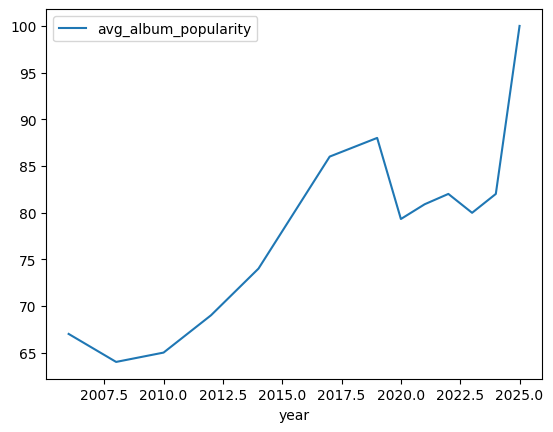

In [80]:
import matplotlib.pyplot as plt
pop_time.plot(x="year", y="avg_album_popularity", kind="line")

In [82]:
#NYT

In [87]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient

SpotifyClient, NYTClient


(ts_media_bridge.spotify_client.SpotifyClient,
 ts_media_bridge.nyt_client.NYTClient)

In [91]:
import ts_media_bridge.nyt_client as nc
import inspect, os

print("NYT module file:", os.path.abspath(nc.__file__))
print([name for name in dir(nc) if "NYT" in name])

NYT module file: /Users/sofiagiorgianni/Downloads/Giorgianni_Sofia/final_project/ts-media-bridge/ts_media_bridge/nyt_client.py
['NYTAuthError', 'NYTClient', 'NYT_BASE_URL']


In [93]:
nyt = NYTClient()

docs = nyt.search_taylor_swift(pages=1)
len(docs)

10

In [94]:
df_articles = nyt.docs_to_df(docs)
df_articles.head()

,pub_date,headline,snippet,section,source,news_desk,type_of_material,web_url
0,2025-10-04T09:01:20Z,Breaking Down Taylor Swift’s ‘The Life of a Sh...,"For a rapid-response episode of Popcast, we jo...",Arts,The New York Times,Culture,News,https://www.nytimes.com/2025/10/04/arts/music/...
1,2025-10-04T17:20:12Z,"In Taylor’s Version, Ophelia Has a Fairy-Tale ...",Taylor Swift reimagines the fate of the tragic...,Arts,The New York Times,Culture,News,https://www.nytimes.com/2025/10/04/arts/music/...
2,2025-08-26T23:29:14Z,This Couple Predicted Taylor Swift and Travis ...,They needed a Halloween costume. Five years la...,Arts,The New York Times,Express,News,https://www.nytimes.com/2025/08/26/arts/taylor...
3,2025-10-03T23:14:21Z,Reaching for a Connection to Taylor Swift,A Democrat in a crowded House primary in Color...,U.S.,The New York Times,Politics,News,https://www.nytimes.com/2025/10/03/us/politics...
4,2025-10-03T23:42:16Z,5 Takeaways From Taylor Swift’s ‘Showgirl’ Movie,The pop star’s new album arrived with a limite...,Arts,The New York Times,Culture,News,https://www.nytimes.com/2025/10/03/arts/music/...


In [ ]:
# Building the merger 

In [95]:
from ts_media_bridge import SpotifyClient, NYTClient

sp = SpotifyClient()
nyt = NYTClient()

df_albums = sp.get_artist_albums_df("06HL4z0CvFAxyc27GXpf02")
df_tracks = sp.get_artist_tracks_df("06HL4z0CvFAxyc27GXpf02")

df_articles = nyt.docs_to_df(nyt.search_taylor_swift(pages=2))

df_albums.head(), df_articles.head()

(                        id                           name  \
 1   4a6NzYL1YHRUgx9e3YZI6I         The Life of a Showgirl   
 4   1Mo4aZ8pdj6L1jx8zSwJnt  THE TORTURED POETS DEPARTMENT   
 6   64LU4c1nfjz1t4VnGhagcg        1989 (Taylor's Version)   
 7   5AEDGbliTTfjOB8TSm1sxt   Speak Now (Taylor's Version)   
 10  151w1FgRZfnKZA9FEcg9Z3                      Midnights   
 
                        base_title album_type  total_tracks release_date  \
 1          The Life of a Showgirl      album            12   2025-10-03   
 4   THE TORTURED POETS DEPARTMENT      album            16   2024-04-18   
 6                            1989      album            21   2023-10-26   
 7                       Speak Now      album            22   2023-07-07   
 10                      Midnights      album            13   2022-10-21   
 
    release_date_precision  popularity         label genres  is_rerecording  \
 1                     day         100  Taylor Swift     []           False   
 4        

In [97]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)
df_tracks = sp.get_artist_tracks_df(TS_ID)
df_articles = nyt.docs_to_df(nyt.search_taylor_swift(pages=2))

df_matches = match_articles_to_albums(df_albums, df_articles)
df_matches[["album_name", "pub_date", "headline", "match_in"]].head(20)

,album_name,pub_date,headline,match_in
0,The Life of a Showgirl,2025-10-04T09:01:20Z,Breaking Down Taylor Swift’s ‘The Life of a Sh...,headline
1,The Life of a Showgirl,2025-10-04T17:20:12Z,"In Taylor’s Version, Ophelia Has a Fairy-Tale ...",snippet
2,The Life of a Showgirl,2025-08-18T09:03:25Z,Anticipating Taylor Swift’s ‘The Life of a Sho...,headline
3,The Life of a Showgirl,2025-10-10T14:12:31Z,Why Is Taylor Swift So Polarizing? And Other B...,snippet
4,The Life of a Showgirl,2025-10-02T09:01:43Z,Taylor Swift Conquered With the Eras Tour. Now...,snippet
5,The Life of a Showgirl,2025-08-12T04:18:26Z,"Taylor Swift Announces New Album, ‘The Life of...",headline
6,The Life of a Showgirl,2025-10-06T15:28:11Z,Taylor Swift Keeps Getting Bigger. Can the Mus...,snippet
7,Red (Taylor's Version),2025-08-26T23:14:48Z,Taylor Swift’s Engagement Ring Marks a Return ...,snippet
8,Red (Taylor's Version),2025-10-02T09:01:43Z,Taylor Swift Conquered With the Eras Tour. Now...,headline
9,Red (Taylor's Version),2025-10-03T04:00:27Z,Taylor Swift Is Now One of His Showgirls,snippet


In [101]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)
df_articles = nyt.docs_to_df(nyt.search_taylor_swift(pages=2))

df_matches = match_articles_to_albums(df_albums, df_articles)
df_matches[["album_name", "pub_date", "headline", "match_in"]].tail()

,album_name,pub_date,headline,match_in
1,The Life of a Showgirl,2025-10-04T09:01:20Z,Breaking Down Taylor Swift’s ‘The Life of a Sh...,headline
2,The Life of a Showgirl,2025-08-12T04:18:26Z,"Taylor Swift Announces New Album, ‘The Life of...",headline
3,The Life of a Showgirl,2025-10-04T17:20:12Z,"In Taylor’s Version, Ophelia Has a Fairy-Tale ...",snippet
4,The Life of a Showgirl,2025-08-18T09:03:25Z,Anticipating Taylor Swift’s ‘The Life of a Sho...,headline
5,The Life of a Showgirl,2025-10-06T15:28:11Z,Taylor Swift Keeps Getting Bigger. Can the Mus...,snippet


In [102]:
nyt = NYTClient()

# Fetch more pages if available — you can increase pages=5 if needed
docs = nyt.search_taylor_swift(pages=3)

df_articles = nyt.docs_to_df(docs)
df_articles = df_articles.sort_values("pub_date")

df_articles[["pub_date", "headline", "snippet"]]


,pub_date,headline,snippet
11,2025-08-12T04:18:26Z,"Taylor Swift Announces New Album, ‘The Life of...",The singer-songwriter revealed the name of her...
5,2025-08-13T23:10:04Z,4 Takeaways From Taylor Swift’s Rare Podcast A...,The pop superstar discussed her upcoming album...
17,2025-08-14T14:00:05Z,How Does Taylor Swift Deal With Internet Noise?,She doesn’t.
4,2025-08-18T09:03:25Z,Anticipating Taylor Swift’s ‘The Life of a Sho...,The singer’s 12th album is being teased as a p...
27,2025-08-26T17:19:27Z,Taylor Swift and Travis Kelce Announce Their E...,The news was announced on Instagram: “Your Eng...
8,2025-08-26T21:19:59Z,The Big Moments From Taylor Swift and Travis K...,"Bogie and Bacall, Marilyn and Joe DiMaggio, Be..."
7,2025-08-26T23:14:48Z,Taylor Swift’s Engagement Ring Marks a Return ...,The pop star’s antique-inspired sparkler chann...
16,2025-08-26T23:29:14Z,This Couple Predicted Taylor Swift and Travis ...,They needed a Halloween costume. Five years la...
2,2025-08-26T23:29:14Z,This Couple Predicted Taylor Swift and Travis ...,They needed a Halloween costume. Five years la...
12,2025-08-27T09:04:48Z,"Thank You, Taylor and Travis. I Needed This.",A new paradigm for the old pairing of male ath...


In [103]:
for i, row in df_articles.iterrows():
    print(f"\n=== ARTICLE {i} ===")
    print("Date:", row["pub_date"])
    print("Headline:", row["headline"])
    print("Snippet:", row["snippet"])



=== ARTICLE 11 ===
Date: 2025-08-12T04:18:26Z
Headline: Taylor Swift Announces New Album, ‘The Life of a Showgirl’
Snippet: The singer-songwriter revealed the name of her 12th original studio album in a surprise announcement, but no other details.

=== ARTICLE 5 ===
Date: 2025-08-13T23:10:04Z
Headline: 4 Takeaways From Taylor Swift’s Rare Podcast Appearance
Snippet: The pop superstar discussed her upcoming album on a podcast co-hosted by her boyfriend, the N.F.L. player Travis Kelce.

=== ARTICLE 17 ===
Date: 2025-08-14T14:00:05Z
Headline: How Does Taylor Swift Deal With Internet Noise?
Snippet: She doesn’t.

=== ARTICLE 4 ===
Date: 2025-08-18T09:03:25Z
Headline: Anticipating Taylor Swift’s ‘The Life of a Showgirl’
Snippet: The singer’s 12th album is being teased as a pivot back to pop bangers. On Popcast, we break down why (and why she announced it the way she did).

=== ARTICLE 27 ===
Date: 2025-08-26T17:19:27Z
Headline: Taylor Swift and Travis Kelce Announce Their Engagement
Snippe

In [109]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import NYTClient
nyt = NYTClient()


In [110]:
docs = nyt.search_album("1989", pages=2)
len(docs)


20

In [120]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, build_album_article_index

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

df_album_articles = build_album_article_index(
    df_albums,
    nyt_client=nyt,
    pages_per_album=2,
    # you can optionally set begin_date/end_date as "YYYYMMDD"
)

df_album_articles[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(30)



[NYT] Searching for album: 'The Life of a Showgirl'

[NYT] Searching for album: 'THE TORTURED POETS DEPARTMENT'

[NYT] Searching for album: '1989'

[NYT] Searching for album: 'Speak Now'
[NYT] Rate limit hit (429) for query '"Speak Now" "Taylor Swift"', page=0. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"Speak Now" "Taylor Swift"', page=0. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"Speak Now" "Taylor Swift"', page=0. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"Speak Now" "Taylor Swift"', page=0. Waiting 8 seconds before retry...
[NYT] Rate limit hit (429) for query '"Speak Now" "Taylor Swift"', page=0. Waiting 16 seconds before retry...
[NYT] Error while searching for 'Speak Now': NYT API failed after 5 retries (last status 429).

[NYT] Searching for album: 'Midnights'
[NYT] Rate limit hit (429) for query '"Midnights" "Taylor Swift"', page=0. Waiting 1 seconds before retry...
[NYT] Rate limit hit (

,album_base_title,pub_date,headline
50,1989,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’
46,1989,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another..."
48,1989,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’
53,1989,2023-04-24T09:00:24Z,Taylor Swift and the Sparkling Trap of Constan...
42,1989,2023-08-10T11:53:43Z,Taylor Swift Announces Fourth Album Rerecordin...
51,1989,2023-08-11T15:41:36Z,Taylor Swift’s Viral Era
47,1989,2023-08-31T12:30:11Z,Taylor Swift Eras Tour Concert Film Coming to ...
52,1989,2023-10-10T13:52:30Z,Morgan Wallen Returns to No. 1 in a Slow Chart...
43,1989,2023-10-25T17:41:01Z,Taylor Swift’s ‘1989’ May Be Her Biggest Rerec...
45,1989,2023-10-27T14:30:40Z,Taylor Swift’s ‘“Slut!”’ and the Evolution of ...


In [121]:
df_album_articles.groupby("album_base_title")["web_url"].nunique()


album_base_title
1989                             20
Fearless                         20
Lover                            20
Red                              20
THE TORTURED POETS DEPARTMENT    20
The Life of a Showgirl           19
folklore                         20
Name: web_url, dtype: int64

In [115]:
mentions_per_album = (
    df_album_articles
    .groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album


,album_base_title,nyt_article_count
0,1989,20
1,Midnights,20
2,Speak Now,20
3,THE TORTURED POETS DEPARTMENT,20
4,Taylor Swift,20
5,The Life of a Showgirl,20
6,evermore,20
7,folklore,20
8,reputation,20


In [118]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import count_mentions_per_album


In [119]:
mentions = count_mentions_per_album(df_album_articles)
mentions


,album_base_title,mention_count
0,1989,20
1,Midnights,20
2,Speak Now,20
3,THE TORTURED POETS DEPARTMENT,20
4,Taylor Swift,20
5,The Life of a Showgirl,20
6,evermore,20
7,folklore,20
8,reputation,20


In [122]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient
from ts_media_bridge.media_bridge import match_articles_to_albums_strict


In [123]:
sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

# 1) General Taylor Swift coverage
docs = nyt.search_taylor_swift(pages=3)
df_articles = nyt.docs_to_df(docs)

# 2) Strict matching
df_matches = match_articles_to_albums_strict(df_articles, df_albums)

df_matches[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(40)


,album_base_title,pub_date,headline
18,Taylor Swift,2025-08-12T04:18:26Z,"Taylor Swift Announces New Album, ‘The Life of..."
8,Taylor Swift,2025-08-13T23:10:04Z,4 Takeaways From Taylor Swift’s Rare Podcast A...
35,Taylor Swift,2025-08-13T23:10:04Z,4 Takeaways From Taylor Swift’s Rare Podcast A...
24,Taylor Swift,2025-08-14T14:00:05Z,How Does Taylor Swift Deal With Internet Noise?
5,Taylor Swift,2025-08-18T09:03:25Z,Anticipating Taylor Swift’s ‘The Life of a Sho...
33,Taylor Swift,2025-08-26T17:19:27Z,Taylor Swift and Travis Kelce Announce Their E...
12,Taylor Swift,2025-08-26T21:19:59Z,The Big Moments From Taylor Swift and Travis K...
11,Taylor Swift,2025-08-26T23:14:48Z,Taylor Swift’s Engagement Ring Marks a Return ...
23,Taylor Swift,2025-08-26T23:29:14Z,This Couple Predicted Taylor Swift and Travis ...
25,Taylor Swift,2025-08-27T19:18:58Z,Taylor Swift and Travis Kelce Got Engaged. So ...


In [124]:
mentions_per_album = (
    df_matches.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album


,album_base_title,nyt_article_count
0,Taylor Swift,28
1,The Life of a Showgirl,9


In [125]:
df_matches = match_articles_to_albums_strict(df_articles, df_albums)

mentions_per_album = (
    df_matches.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album


,album_base_title,nyt_article_count
0,Taylor Swift,28
1,The Life of a Showgirl,9


In [126]:
import re
import pandas as pd

def match_articles_to_albums_strict_nb(df_articles: pd.DataFrame,
                                       df_albums: pd.DataFrame) -> pd.DataFrame:
    """
    Notebook-only helper: strictly match NYT articles to TS albums.

    - Skips ambiguous debut album 'Taylor Swift'
    - Uses exact phrase match for album titles in headline+snippet.
    """
    rows = []

    # use base_title values, but skip 'Taylor Swift'
    titles = [
        t for t in df_albums["base_title"].dropna().unique()
        if t.lower() != "taylor swift"
    ]

    for _, art in df_articles.iterrows():
        text = f"{art.get('headline', '')} {art.get('snippet', '')}".lower()

        for title in titles:
            pattern = r"\b" + re.escape(title.lower()) + r"\b"
            if re.search(pattern, text):
                rows.append(
                    {
                        "album_base_title": title,
                        "pub_date": art.get("pub_date"),
                        "headline": art.get("headline"),
                        "snippet": art.get("snippet"),
                        "web_url": art.get("web_url"),
                    }
                )

    return pd.DataFrame(rows)


In [128]:
sp = SpotifyClient()
nyt = NYTClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

docs = nyt.search_taylor_swift(pages=3)
df_articles = nyt.docs_to_df(docs)


[NYT] Rate limit hit (429) for query 'Taylor Swift', page=2. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query 'Taylor Swift', page=2. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query 'Taylor Swift', page=2. Waiting 4 seconds before retry...


In [129]:
df_matches = match_articles_to_albums_strict_nb(df_articles, df_albums)

df_matches[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
)


,album_base_title,pub_date,headline
2,The Life of a Showgirl,2025-08-12T04:18:26Z,"Taylor Swift Announces New Album, ‘The Life of..."
0,The Life of a Showgirl,2025-08-18T09:03:25Z,Anticipating Taylor Swift’s ‘The Life of a Sho...
8,The Life of a Showgirl,2025-09-30T09:04:16Z,When Did You Know Taylor Swift Would Be a Pop ...
1,The Life of a Showgirl,2025-10-04T09:01:20Z,Breaking Down Taylor Swift’s ‘The Life of a Sh...
3,The Life of a Showgirl,2025-10-04T17:20:12Z,"In Taylor’s Version, Ophelia Has a Fairy-Tale ..."
6,The Life of a Showgirl,2025-10-04T17:20:12Z,"In Taylor’s Version, Ophelia Has a Fairy-Tale ..."
5,The Life of a Showgirl,2025-10-06T15:28:11Z,Taylor Swift Keeps Getting Bigger. Can the Mus...
7,The Life of a Showgirl,2025-10-08T19:45:34Z,A Taylor Swift Mystery: Which Musso and Frank’...
4,The Life of a Showgirl,2025-10-10T14:12:31Z,Why Is Taylor Swift So Polarizing? And Other B...


In [130]:
mentions_per_album = (
    df_matches.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album


,album_base_title,nyt_article_count
0,The Life of a Showgirl,8


In [131]:
from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, album_mention_summary

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_matches, mentions_per_album = album_mention_summary(
    sp,
    nyt,
    artist_id=TS_ID,
    pages=3,
)

df_matches[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(20)

mentions_per_album


ImportError: cannot import name 'album_mention_summary' from 'ts_media_bridge.media_bridge' (/Users/sofiagiorgianni/Downloads/Giorgianni_Sofia/final_project/ts-media-bridge/ts_media_bridge/media_bridge.py)

In [132]:
import sys
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)


<module 'ts_media_bridge' from '/Users/sofiagiorgianni/Downloads/Giorgianni_Sofia/final_project/ts-media-bridge/ts_media_bridge/__init__.py'>

In [133]:
from ts_media_bridge import SpotifyClient, NYTClient, album_mention_summary

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_matches, mentions_per_album = album_mention_summary(
    sp,
    nyt,
    artist_id=TS_ID,
    pages=3,
)

df_matches[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(20)

mentions_per_album

,album_base_title,nyt_article_count
0,The Life of a Showgirl,7


In [134]:
from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, album_mention_summary

TS_ID = "06HL4z0CvFAxyc27GXpf02"  # Taylor Swift

sp = SpotifyClient()
nyt = NYTClient()

# 1) Albums from Spotify
df_albums = sp.get_artist_albums_df(TS_ID)
df_albums.head(), df_albums.columns

(                        id                           name  \
 1   4a6NzYL1YHRUgx9e3YZI6I         The Life of a Showgirl   
 4   1Mo4aZ8pdj6L1jx8zSwJnt  THE TORTURED POETS DEPARTMENT   
 6   64LU4c1nfjz1t4VnGhagcg        1989 (Taylor's Version)   
 7   5AEDGbliTTfjOB8TSm1sxt   Speak Now (Taylor's Version)   
 10  151w1FgRZfnKZA9FEcg9Z3                      Midnights   
 
                        base_title album_type  total_tracks release_date  \
 1          The Life of a Showgirl      album            12   2025-10-03   
 4   THE TORTURED POETS DEPARTMENT      album            16   2024-04-18   
 6                            1989      album            21   2023-10-26   
 7                       Speak Now      album            22   2023-07-07   
 10                      Midnights      album            13   2022-10-21   
 
    release_date_precision  popularity         label genres  is_rerecording  \
 1                     day         100  Taylor Swift     []           False   
 4        

In [135]:
df_matches, mentions_per_album = album_mention_summary(
    sp,
    nyt,
    artist_id=TS_ID,
    pages=3,   # you can tweak this later
)

mentions_per_album

,album_base_title,nyt_article_count
0,The Life of a Showgirl,8


In [136]:
# Make a copy with a clearer album_name column
df_albums2 = df_albums.rename(columns={"name": "album_name"})

# mentions_per_album has: album_base_title, nyt_article_count
# rename album_base_title -> base_title so we can join
mentions2 = mentions_per_album.rename(columns={"album_base_title": "base_title"})

album_universe_df = df_albums2.merge(
    mentions2,
    on="base_title",
    how="left",       # keep all albums, even if NYT never mentioned them
)

# Albums with no NYT coverage get 0 instead of NaN
album_universe_df["nyt_article_count"] = (
    album_universe_df["nyt_article_count"]
    .fillna(0)
    .astype("int64")
)

album_universe_df.head(), album_universe_df.columns


(                       id                     album_name  \
 0  4a6NzYL1YHRUgx9e3YZI6I         The Life of a Showgirl   
 1  1Mo4aZ8pdj6L1jx8zSwJnt  THE TORTURED POETS DEPARTMENT   
 2  64LU4c1nfjz1t4VnGhagcg        1989 (Taylor's Version)   
 3  5AEDGbliTTfjOB8TSm1sxt   Speak Now (Taylor's Version)   
 4  151w1FgRZfnKZA9FEcg9Z3                      Midnights   
 
                       base_title album_type  total_tracks release_date  \
 0         The Life of a Showgirl      album            12   2025-10-03   
 1  THE TORTURED POETS DEPARTMENT      album            16   2024-04-18   
 2                           1989      album            21   2023-10-26   
 3                      Speak Now      album            22   2023-07-07   
 4                      Midnights      album            13   2022-10-21   
 
   release_date_precision  popularity         label genres  is_rerecording  \
 0                    day         100  Taylor Swift     []           False   
 1                    da

In [137]:
# Build your track-level DF using your Spotify client method
df_tracks = sp.get_artist_tracks_df(TS_ID)

df_tracks.head(), df_tracks.columns


(                 album_id              album_name        album_base_title  \
 0  4a6NzYL1YHRUgx9e3YZI6I  The Life of a Showgirl  The Life of a Showgirl   
 1  4a6NzYL1YHRUgx9e3YZI6I  The Life of a Showgirl  The Life of a Showgirl   
 2  4a6NzYL1YHRUgx9e3YZI6I  The Life of a Showgirl  The Life of a Showgirl   
 3  4a6NzYL1YHRUgx9e3YZI6I  The Life of a Showgirl  The Life of a Showgirl   
 4  4a6NzYL1YHRUgx9e3YZI6I  The Life of a Showgirl  The Life of a Showgirl   
 
   album_type album_release_date  album_popularity   album_label  \
 0      album         2025-10-03               100  Taylor Swift   
 1      album         2025-10-03               100  Taylor Swift   
 2      album         2025-10-03               100  Taylor Swift   
 3      album         2025-10-03               100  Taylor Swift   
 4      album         2025-10-03               100  Taylor Swift   
 
    album_is_rerecording  album_is_deluxe                track_id  \
 0                 False            False  53iuhJlw

In [138]:
import pandas as pd

track_agg = (
    df_tracks
    .groupby("album_id")
    .agg(
        n_tracks=("track_id", "nunique"),
        mean_duration_ms=("duration_ms", "mean"),
        explicit_share=("explicit", "mean"),  # fraction of tracks marked explicit
    )
    .reset_index()
)

track_agg.head()


,album_id,n_tracks,mean_duration_ms,explicit_share
0,151w1FgRZfnKZA9FEcg9Z3,13,203718.307692,0.461538
1,1EoDsNmgTLtmwe1BDAVxV5,16,243462.125000,0.000000
2,1Mo4aZ8pdj6L1jx8zSwJnt,16,244731.562500,0.437500
3,1NAmidJlEaVgA3MpcPFYGq,18,206187.833333,0.000000
4,1pzvBxYgT6OVwJLtHkrdQK,17,236964.470588,0.294118


In [139]:
album_universe_df = album_universe_df.merge(
    track_agg,
    left_on="id",
    right_on="album_id",
    how="left",
)

# Clean up duplicate id column if you want
album_universe_df = album_universe_df.drop(columns=["album_id"])

album_universe_df.head(), album_universe_df.shape


(                       id                     album_name  \
 0  4a6NzYL1YHRUgx9e3YZI6I         The Life of a Showgirl   
 1  1Mo4aZ8pdj6L1jx8zSwJnt  THE TORTURED POETS DEPARTMENT   
 2  64LU4c1nfjz1t4VnGhagcg        1989 (Taylor's Version)   
 3  5AEDGbliTTfjOB8TSm1sxt   Speak Now (Taylor's Version)   
 4  151w1FgRZfnKZA9FEcg9Z3                      Midnights   
 
                       base_title album_type  total_tracks release_date  \
 0         The Life of a Showgirl      album            12   2025-10-03   
 1  THE TORTURED POETS DEPARTMENT      album            16   2024-04-18   
 2                           1989      album            21   2023-10-26   
 3                      Speak Now      album            22   2023-07-07   
 4                      Midnights      album            13   2022-10-21   
 
   release_date_precision  popularity         label genres  is_rerecording  \
 0                    day         100  Taylor Swift     []           False   
 1                    da

In [140]:
album_universe_df[["album_name", "release_date", "nyt_article_count"]].sort_values(
    "release_date"
)


,album_name,release_date,nyt_article_count
17,Taylor Swift,2006-10-24,0
16,Fearless,2008-11-11,0
15,Speak Now,2010-10-25,0
14,Red,2012-10-22,0
13,1989,2014-10-27,0
12,reputation,2017-11-10,0
11,Lover,2019-08-23,0
10,folklore,2020-07-24,0
9,folklore (deluxe version),2020-08-18,0
8,evermore,2020-12-11,0


In [141]:
album_universe_df[["album_name", "popularity", "nyt_article_count"]]


,album_name,popularity,nyt_article_count
0,The Life of a Showgirl,100,8
1,THE TORTURED POETS DEPARTMENT,82,0
2,1989 (Taylor's Version),82,0
3,Speak Now (Taylor's Version),79,0
4,Midnights,82,0
5,Red (Taylor's Version),83,0
6,Fearless (Taylor's Version),81,0
7,evermore (deluxe version),77,0
8,evermore,76,0
9,folklore (deluxe version),75,0


In [143]:
from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, build_album_article_index

sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

df_album_articles = build_album_article_index(
    df_albums,
    nyt_client=nyt,
    pages_per_album=2,  # maybe start with 1 to be gentle on rate limits
)

df_album_articles[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(40)


[NYT] Searching for album: 'The Life of a Showgirl'

[NYT] Searching for album: 'THE TORTURED POETS DEPARTMENT'

[NYT] Searching for album: '1989'
[NYT] Rate limit hit (429) for query '"1989" "Taylor Swift"', page=1. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"1989" "Taylor Swift"', page=1. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"1989" "Taylor Swift"', page=1. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"1989" "Taylor Swift"', page=1. Waiting 8 seconds before retry...
[NYT] Rate limit hit (429) for query '"1989" "Taylor Swift"', page=1. Waiting 16 seconds before retry...
[NYT] Error while searching for '1989': NYT API failed after 5 retries (last status 429).

[NYT] Searching for album: 'Speak Now'

[NYT] Searching for album: 'Midnights'

[NYT] Searching for album: 'Red'
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=1. Waiting 1 seconds before retry...
[NYT] Rate limit hit (42

,album_base_title,pub_date,headline
96,Fearless,2024-05-17T22:19:10Z,How Big Is Taylor Swift?
95,Fearless,2024-06-10T14:42:20Z,Taylor Swift Bests K-Pop Band to Stay No. 1 fo...
93,Fearless,2024-06-24T17:49:20Z,Taylor Swift Notches a Ninth Week at No. 1 Wit...
92,Fearless,2024-07-15T13:48:06Z,Taylor Swift Breaks Her Own Record With a 12th...
89,Fearless,2024-07-17T18:10:46Z,Popcast (Deluxe): Ranking Every Taylor Swift A...
91,Fearless,2024-09-11T19:21:32Z,"How Taylor Swift Surprised Harris, and Entered..."
86,Fearless,2024-10-31T19:00:03Z,What’s Going On in This Graph? | Taylor Swift
90,Fearless,2024-11-08T16:18:43Z,Beyoncé and Young Women Pop Sensations Lead 20...
87,Fearless,2024-12-08T10:02:10Z,"For Taylor Swift, It’s the End of the ‘Eras’"
88,Fearless,2024-12-13T01:28:55Z,Match the Taylor Swift Song to the Poem Inspir...


In [146]:
import ts_media_bridge, inspect

import ts_media_bridge.media_bridge as mb

print("media_bridge file:", mb.__file__)
print("\n=== Active build_album_article_index implementation ===")
print(inspect.getsource(mb.build_album_article_index))


media_bridge file: /Users/sofiagiorgianni/Downloads/Giorgianni_Sofia/final_project/ts-media-bridge/ts_media_bridge/media_bridge.py

=== Active build_album_article_index implementation ===


def count_mentions_per_album(
    df_album_articles: pd.DataFrame,
    unique_by_url: bool = True,
) -> pd.DataFrame:
    """
    Summarize how many NYT articles mention each album.

    Parameters
    ----------
    df_album_articles : DataFrame
        Output of build_album_article_index(), with at least:
        - album_base_title
        - web_url
    unique_by_url : bool, default True
        If True, count unique web_url per album (avoids double-counting
        the same article). If False, simply counts rows.

    Returns
    -------
    DataFrame
        Columns:
        - album_base_title
        - mention_count
    """
    if df_album_articles is None or df_album_articles.empty:
        return pd.DataFrame(columns=["album_base_title", "mention_count"])

    if unique_by_url and "web_url" i

In [147]:
import datetime
import pandas as pd
from typing import List

from ts_media_bridge import NYTClient, SpotifyClient

# local copy of canonical release dates
TS_ALBUM_RELEASE_DATES = {
    "Taylor Swift": "2006-10-24",
    "Fearless": "2008-11-11",
    "Speak Now": "2010-10-25",
    "Red": "2012-10-22",
    "1989": "2014-10-27",
    "reputation": "2017-11-10",
    "Lover": "2019-08-23",
    "folklore": "2020-07-24",
    "evermore": "2020-12-11",
    "Midnights": "2022-10-21",
    "THE TORTURED POETS DEPARTMENT": "2024-04-19",
    "The Life of a Showgirl": "2025-10-03",

    "Fearless (Taylor's Version)": "2021-04-09",
    "Red (Taylor's Version)": "2021-11-12",
    "Speak Now (Taylor's Version)": "2023-07-07",
    "1989 (Taylor's Version)": "2023-10-27",

    "folklore (deluxe version)": "2020-08-18",
    "evermore (deluxe version)": "2021-01-07",
}

def album_to_search_window(release_date: str, years_after: int = 2) -> tuple[str, str]:
    dt = datetime.datetime.strptime(release_date, "%Y-%m-%d")
    begin = dt.replace(month=1, day=1)
    end = begin.replace(year=begin.year + years_after)
    return begin.strftime("%Y%m%d"), end.strftime("%Y%m%d")


def build_album_article_index_windowed(
    df_albums: pd.DataFrame,
    nyt_client: NYTClient,
    pages_per_album: int = 1,
) -> pd.DataFrame:
    """
    Notebook-local version: uses album release dates to set begin/end_date
    when querying NYT.
    """
    all_rows: List[pd.DataFrame] = []

    for _, row in df_albums.iterrows():
        title = row["base_title"]

        release_date = TS_ALBUM_RELEASE_DATES.get(title)
        if not release_date:
            print(f"[NYT] Skipping album with unknown release date: {title}")
            continue

        begin_date, end_date = album_to_search_window(release_date)

        print(
            f"\n[NYT] Searching {title!r} "
            f"(release {release_date}) between {begin_date} and {end_date}"
        )

        try:
            docs = nyt_client.search_album(
                album_name=title,
                pages=pages_per_album,
                begin_date=begin_date,
                end_date=end_date,
            )
        except Exception as e:
            print(f"[NYT] Error while searching for {title!r}: {e}")
            continue

        if not docs:
            continue

        df_docs = nyt_client.docs_to_df(docs)
        if df_docs.empty:
            continue

        df_docs["album_base_title"] = title
        all_rows.append(df_docs)

    if not all_rows:
        return pd.DataFrame()

    return pd.concat(all_rows, ignore_index=True)


In [148]:
sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

df_album_articles = build_album_article_index_windowed(
    df_albums,
    nyt_client=nyt,
    pages_per_album=1,   # 1 page to avoid 429s as much as possible
)

df_album_articles[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(40)



[NYT] Searching 'The Life of a Showgirl' (release 2025-10-03) between 20250101 and 20270101

[NYT] Searching 'THE TORTURED POETS DEPARTMENT' (release 2024-04-19) between 20240101 and 20260101

[NYT] Searching '1989' (release 2014-10-27) between 20140101 and 20160101

[NYT] Searching 'Speak Now' (release 2010-10-25) between 20100101 and 20120101

[NYT] Searching 'Midnights' (release 2022-10-21) between 20220101 and 20240101

[NYT] Searching 'Red' (release 2012-10-22) between 20120101 and 20140101
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 8 seconds before retry...

[NYT] Searching 'Fearless' (release 2008-11-11) between 20080101 and 20100101

[NYT] 

,album_base_title,pub_date,headline
26,1989,2014-10-22T19:27:21Z,Taylor Swift’s ‘1989’ Carries High Hopes
116,1989,2014-10-22T19:27:21Z,Taylor Swift’s ‘1989’ Carries High Hopes
23,1989,2014-10-23T12:00:07Z,A Farewell to Twang
113,1989,2014-10-23T12:00:07Z,A Farewell to Twang
22,1989,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’
112,1989,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’
20,1989,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another..."
110,1989,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another..."
21,1989,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’
111,1989,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’


In [149]:
df_album_articles[["album_base_title", "pub_date", "headline"]].sort_values(
    ["album_base_title", "pub_date"]
).head(20)

,album_base_title,pub_date,headline
26,1989,2014-10-22T19:27:21Z,Taylor Swift’s ‘1989’ Carries High Hopes
116,1989,2014-10-22T19:27:21Z,Taylor Swift’s ‘1989’ Carries High Hopes
23,1989,2014-10-23T12:00:07Z,A Farewell to Twang
113,1989,2014-10-23T12:00:07Z,A Farewell to Twang
22,1989,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’
112,1989,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’
20,1989,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another..."
110,1989,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another..."
21,1989,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’
111,1989,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’


In [150]:
# 1) How many rows total?
len(df_album_articles)


150

In [151]:
mentions_per_album = (
    df_album_articles.groupby("album_base_title")["web_url"]
    .nunique()  # unique URLs so duplicates like 26/116 collapse
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album


,album_base_title,nyt_article_count
0,1989,10
1,Fearless,10
2,Midnights,10
3,Red,10
4,Speak Now,10
5,THE TORTURED POETS DEPARTMENT,10
6,The Life of a Showgirl,10
7,evermore,10
8,folklore,10
9,reputation,10


In [152]:
album = "1989"

df_album_articles[
    df_album_articles["album_base_title"] == album
][["pub_date", "headline", "web_url"]].drop_duplicates("web_url")


,pub_date,headline,web_url
20,2014-10-29T17:12:43Z,"With ‘1989,’ Taylor Swift Set to Notch Another...",https://artsbeat.blogs.nytimes.com/2014/10/29/...
21,2014-11-05T09:34:54Z,Test Yourself | Taylor Swift’s ‘1989’,https://learning.blogs.nytimes.com/2014/11/05/...
22,2014-10-27T14:16:57Z,Listening to Taylor Swift’s ‘1989’,https://artsbeat.blogs.nytimes.com/2014/10/27/...
23,2014-10-23T12:00:07Z,A Farewell to Twang,https://www.nytimes.com/2014/10/26/arts/music/...
24,2015-12-07T16:46:04Z,Grammy Nominations 2016,https://www.nytimes.com/2015/12/08/arts/music/...
25,2015-06-25T17:55:25Z,Taylor Swift to Stream ‘1989’ Album on Apple M...,https://www.nytimes.com/2015/06/26/business/me...
26,2014-10-22T19:27:21Z,Taylor Swift’s ‘1989’ Carries High Hopes,https://www.nytimes.com/2014/10/23/business/me...
27,2014-11-05T19:14:24Z,Sales of Taylor Swift’s ‘1989’ Intensify Strea...,https://www.nytimes.com/2014/11/06/arts/music/...
28,2014-11-12T18:08:12Z,Taylor Swift’s ‘1989’ Reigns at No. 1,https://artsbeat.blogs.nytimes.com/2014/11/12/...
29,2015-05-21T12:12:27Z,"Review: On Taylor Swift’s ‘1989’ Tour, the Und...",https://www.nytimes.com/2015/05/22/arts/music/...


In [153]:
df_album_articles = build_album_article_index_windowed(
    df_albums,
    nyt_client=nyt,
    pages_per_album=3   # use 3 or 5
)

mentions_per_album = (
    df_album_articles.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

mentions_per_album



[NYT] Searching 'The Life of a Showgirl' (release 2025-10-03) between 20250101 and 20270101

[NYT] Searching 'THE TORTURED POETS DEPARTMENT' (release 2024-04-19) between 20240101 and 20260101
[NYT] Rate limit hit (429) for query '"THE TORTURED POETS DEPARTMENT" "Taylor Swift"', page=2. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"THE TORTURED POETS DEPARTMENT" "Taylor Swift"', page=2. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"THE TORTURED POETS DEPARTMENT" "Taylor Swift"', page=2. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"THE TORTURED POETS DEPARTMENT" "Taylor Swift"', page=2. Waiting 8 seconds before retry...
[NYT] Rate limit hit (429) for query '"THE TORTURED POETS DEPARTMENT" "Taylor Swift"', page=2. Waiting 16 seconds before retry...
[NYT] Error while searching for 'THE TORTURED POETS DEPARTMENT': NYT API failed after 5 retries (last status 429).

[NYT] Searching '1989' (release 2014-10-27) b

,album_base_title,nyt_article_count
0,1989,30
1,Red,30
3,The Life of a Showgirl,30
5,folklore,30
6,reputation,30
4,evermore,29
2,Taylor Swift,17


In [154]:
import pandas as pd

# 1) Canonical album list (from the same dict you used in the helper)
TS_ALBUM_RELEASE_DATES = {
    "Taylor Swift": "2006-10-24",
    "Fearless": "2008-11-11",
    "Speak Now": "2010-10-25",
    "Red": "2012-10-22",
    "1989": "2014-10-27",
    "reputation": "2017-11-10",
    "Lover": "2019-08-23",
    "folklore": "2020-07-24",
    "evermore": "2020-12-11",
    "Midnights": "2022-10-21",
    "THE TORTURED POETS DEPARTMENT": "2024-04-19",
    "The Life of a Showgirl": "2025-10-03",

    "Fearless (Taylor's Version)": "2021-04-09",
    "Red (Taylor's Version)": "2021-11-12",
    "Speak Now (Taylor's Version)": "2023-07-07",
    "1989 (Taylor's Version)": "2023-10-27",

    "folklore (deluxe version)": "2020-08-18",
    "evermore (deluxe version)": "2021-01-07",
}

# 2) Turn that into a DataFrame
df_albums_all = (
    pd.DataFrame(
        [
            {"album_base_title": name, "release_date": date}
            for name, date in TS_ALBUM_RELEASE_DATES.items()
        ]
    )
    .sort_values("release_date")
    .reset_index(drop=True)
)

# 3) Left-join counts onto the full album list
mentions_full = df_albums_all.merge(
    mentions_per_album,
    on="album_base_title",
    how="left",
)

# 4) Treat NaN counts as 0
mentions_full["nyt_article_count"] = mentions_full["nyt_article_count"].fillna(0).astype(int)

mentions_full


,album_base_title,release_date,nyt_article_count
0,Taylor Swift,2006-10-24,17
1,Fearless,2008-11-11,0
2,Speak Now,2010-10-25,0
3,Red,2012-10-22,30
4,1989,2014-10-27,30
5,reputation,2017-11-10,30
6,Lover,2019-08-23,0
7,folklore,2020-07-24,30
8,folklore (deluxe version),2020-08-18,0
9,evermore,2020-12-11,29


In [162]:
import sys

# Clear cached ts_media_bridge modules
for name in list(sys.modules):
    if name.startswith("ts_media_bridge"):
        del sys.modules[name]

from importlib import reload
import ts_media_bridge
reload(ts_media_bridge)

from ts_media_bridge import SpotifyClient, NYTClient, build_album_article_index_windowed

SpotifyClient, NYTClient, build_album_article_index_windowed

(ts_media_bridge.spotify_client.SpotifyClient,
 ts_media_bridge.nyt_client.NYTClient,
 <function ts_media_bridge.media_bridge.build_album_article_index_windowed(df_albums: 'pd.DataFrame', nyt_client: 'NYTClient', pages_per_album: 'int' = 1, years_after: 'int' = 2) -> 'pd.DataFrame'>)

In [163]:
mentions_per_album = (
    df_album_articles.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
)

# join with canonical album list like you already did
mentions_full = df_albums_all.merge(
    mentions_per_album,
    on="album_base_title",
    how="left",
)
mentions_full["nyt_article_count"] = mentions_full["nyt_article_count"].fillna(0).astype(int)
mentions_full


,album_base_title,release_date,nyt_article_count
0,Taylor Swift,2006-10-24,17
1,Fearless,2008-11-11,0
2,Speak Now,2010-10-25,0
3,Red,2012-10-22,30
4,1989,2014-10-27,30
5,reputation,2017-11-10,30
6,Lover,2019-08-23,0
7,folklore,2020-07-24,30
8,folklore (deluxe version),2020-08-18,0
9,evermore,2020-12-11,29


In [164]:
sp = SpotifyClient()
nyt = NYTClient()

TS_ID = "06HL4z0CvFAxyc27GXpf02"

df_albums = sp.get_artist_albums_df(TS_ID)

df_album_articles = build_album_article_index_windowed(
    df_albums,
    nyt_client=nyt,
    pages_per_album=1,   # keep this small to avoid 429s
)

df_album_articles[["album_base_title", "pub_date", "headline"]].head()



[NYT] Searching 'The Life of a Showgirl' (release 2025-10-03) between 20250101 and 20270101

[NYT] Searching 'THE TORTURED POETS DEPARTMENT' (release 2024-04-19) between 20240101 and 20260101

[NYT] Searching '1989' (release 2014-10-27) between 20140101 and 20160101

[NYT] Searching 'Speak Now' (release 2010-10-25) between 20100101 and 20120101

[NYT] Searching 'Midnights' (release 2022-10-21) between 20220101 and 20240101

[NYT] Searching 'Red' (release 2012-10-22) between 20120101 and 20140101
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 8 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 16 second

,album_base_title,pub_date,headline
0,The Life of a Showgirl,2025-10-03T04:00:12Z,"On ‘Showgirl,’ Taylor Swift Has a Lust for Lov..."
1,The Life of a Showgirl,2025-10-04T09:01:20Z,Breaking Down Taylor Swift’s ‘The Life of a Sh...
2,The Life of a Showgirl,2025-10-03T23:42:16Z,5 Takeaways From Taylor Swift’s ‘Showgirl’ Movie
3,The Life of a Showgirl,2025-10-06T15:28:11Z,Taylor Swift Keeps Getting Bigger. Can the Mus...
4,The Life of a Showgirl,2025-10-10T14:12:31Z,Why Is Taylor Swift So Polarizing? And Other B...


In [165]:
from ts_media_bridge import SpotifyClient, NYTClient
from ts_media_bridge import build_album_article_index_windowed

# Initialize clients
sp = SpotifyClient()
nyt = NYTClient()

# Taylor Swift's Spotify ID
TS_ID = "06HL4z0CvFAxyc27GXpf02"

# Get albums from Spotify
df_albums = sp.get_artist_albums_df(TS_ID)
print(f"Found {len(df_albums)} canonical albums")

# Search NYT for articles about each album
# Note: This will be SLOW due to rate limiting (6.5s between requests)
# For 18 albums, expect ~2 minutes minimum
df_album_articles = build_album_article_index_windowed(
    df_albums,
    nyt_client=nyt,
    pages_per_album=1,  # Keep this at 1 to avoid taking forever
    years_after=2,      # Search 2 years after each album release
)

# Count mentions per album
mentions = (
    df_album_articles.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

print(mentions)

Found 18 canonical albums

[NYT] Searching 'The Life of a Showgirl' (release 2025-10-03) between 20250101 and 20270101

[NYT] Searching 'THE TORTURED POETS DEPARTMENT' (release 2024-04-19) between 20240101 and 20260101

[NYT] Searching '1989' (release 2014-10-27) between 20140101 and 20160101

[NYT] Searching 'Speak Now' (release 2010-10-25) between 20100101 and 20120101

[NYT] Searching 'Midnights' (release 2022-10-21) between 20220101 and 20240101

[NYT] Searching 'Red' (release 2012-10-22) between 20120101 and 20140101
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 1 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 2 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 4 seconds before retry...
[NYT] Rate limit hit (429) for query '"Red" "Taylor Swift"', page=0. Waiting 8 seconds before retry...

[NYT] Searching 'Fearless' (release 2008-11-11) between 200

In [168]:
# Force reload everything
import sys
# Remove cached imports
for module in list(sys.modules.keys()):
    if 'ts_media_bridge' in module:
        del sys.modules[module]

# Now import fresh
from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums
import pandas as pd

print("✓ Successfully imported!")

✓ Successfully imported!


In [169]:
print(match_articles_to_albums)


<function match_articles_to_albums at 0x11a003c40>


In [170]:
# Cell 1: Imports
from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums
import pandas as pd

# Cell 2: Initialize
sp = SpotifyClient()
nyt = NYTClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

# Cell 3: Get albums from Spotify
df_albums = sp.get_artist_albums_df(TS_ID)
print(f"Found {len(df_albums)} albums")

# Cell 4: Get NYT articles (this is the better strategy!)
print("Fetching NYT articles...")
docs = nyt.search_taylor_swift(pages=5)  # 5 pages = 50 articles
df_articles = nyt.docs_to_df(docs)
print(f"Found {len(df_articles)} articles")

# Cell 5: Match articles to albums
df_matched = match_articles_to_albums(df_albums, df_articles)
print(f"Matched {len(df_matched)} article-album pairs")

# Cell 6: Count mentions
mentions = (
    df_matched.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)
print(mentions)

# Cell 7: Visualizations and analysis...

Found 18 albums
Fetching NYT articles...
[NYT] Rate limiting: waiting 5.6s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.9s before next request...
Found 50 articles
Matched 15 article-album pairs
         album_base_title  nyt_article_count
1  The Life of a Showgirl                 12
0                     Red                  1
2              reputation                  1


In [171]:
# Get more pages to get better coverage of all albums
docs = nyt.search_taylor_swift(pages=10)  # 100 articles instead of 50

[NYT] Rate limiting: waiting 5.6s before next request...
[NYT] Rate limiting: waiting 6.1s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.9s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...


In [172]:
# Get articles from different eras
all_docs = []

# Recent articles (2023-2025)
all_docs.extend(nyt.search_taylor_swift(pages=3, begin_date="20230101"))

# Mid-period (2019-2022)
all_docs.extend(nyt.search_taylor_swift(pages=3, begin_date="20190101", end_date="20221231"))

# Older articles (2014-2018)
all_docs.extend(nyt.search_taylor_swift(pages=3, begin_date="20140101", end_date="20181231"))

df_articles = nyt.docs_to_df(all_docs)

[NYT] Rate limit hit (429) despite precautions! Waiting 8s before retry 1/3...
[NYT] Rate limit hit (429) despite precautions! Waiting 16s before retry 2/3...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.5s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.6s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limit hit (429) despite precautions! Waiting 8s before retry 1/3...
[NYT] Rate limit hit (429) despite precautions! Waiting 16s before retry 2/3...
[NYT] Rate limit hit (429) despite precautions! Waiting 32s before retry 3/3...


RuntimeError: NYT API failed after 3 retries (last status 429).

In [173]:
# Look at what got matched
print("\nSample matches:")
print(df_matched[['album_base_title', 'headline', 'match_in']].head(10))


Sample matches:
         album_base_title                                           headline  \
0  The Life of a Showgirl  Why Is Taylor Swift So Polarizing? And Other B...   
1  The Life of a Showgirl  Anticipating Taylor Swift’s ‘The Life of a Sho...   
2  The Life of a Showgirl  Breaking Down Taylor Swift’s ‘The Life of a Sh...   
3  The Life of a Showgirl  Taylor Swift Announces New Album, ‘The Life of...   
4  The Life of a Showgirl  In Taylor’s Version, Ophelia Has a Fairy-Tale ...   
5  The Life of a Showgirl  Taylor Swift Keeps Getting Bigger. Can the Mus...   
6  The Life of a Showgirl  A Taylor Swift Mystery: Which Musso and Frank’...   
7  The Life of a Showgirl  When Did You Know Taylor Swift Would Be a Pop ...   
8  The Life of a Showgirl  Taylor Swift Conquered With the Eras Tour. Now...   
9  The Life of a Showgirl  Taylor Swift Fans Try to Decode ‘The Life of a...   

   match_in  
0   snippet  
1  headline  
2  headline  
3  headline  
4   snippet  
5   snippet  
6   

In [174]:
"""
SIMPLE & SAFE Version - Copy this into your notebook
=====================================================

This fetches fewer articles but won't hit rate limits.
Good for testing and initial analysis.
"""

from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums
import pandas as pd

sp = SpotifyClient()
nyt = NYTClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

# Get albums
df_albums = sp.get_artist_albums_df(TS_ID)
print(f"Found {len(df_albums)} albums\n")

# Fetch articles - JUST 7-8 PAGES TOTAL to avoid rate limits
# This takes ~45 seconds but is safe
print("Fetching NYT articles (this takes ~45 seconds)...")

# Option 1: Just get recent articles (SIMPLEST)
docs = nyt.search_taylor_swift(pages=7)  # 70 articles

# Option 2: If you want coverage across time, do this instead:
# all_docs = []
# all_docs.extend(nyt.search_taylor_swift(pages=4, begin_date="20230101"))  # recent
# all_docs.extend(nyt.search_taylor_swift(pages=3, begin_date="20140101", end_date="20221231"))  # older
# docs = all_docs

df_articles = nyt.docs_to_df(docs)
df_articles = df_articles.drop_duplicates(subset=['web_url'])
print(f"Found {len(df_articles)} unique articles\n")

# Match to albums
df_matched = match_articles_to_albums(df_albums, df_articles)
print(f"Matched {len(df_matched)} article-album pairs\n")

# Count mentions
mentions = (
    df_matched.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

print("NYT Mentions by Album:")
print(mentions.to_string(index=False))

# Show sample matches
print("\n\nSample Matched Articles:")
print(df_matched[['album_base_title', 'headline', 'match_in']].head(15))

# Save results
df_matched.to_csv('matched_articles.csv', index=False)
print(f"\n✓ Saved to matched_articles.csv")

Found 18 albums

Fetching NYT articles (this takes ~45 seconds)...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
Found 69 unique articles

Matched 15 article-album pairs

NYT Mentions by Album:
      album_base_title  nyt_article_count
The Life of a Showgirl                 12
                   Red                  1
            reputation                  1


Sample Matched Articles:
          album_base_title                                           headline  \
0   The Life of a Showgirl  In Taylor’s Version, Ophelia Has a Fairy-Tale ...   
1   The Life of a Showgirl  Anticipating Taylor Swift’s ‘The Life of a Sho...   
2   The Life of a Showgirl  Why Is Taylor Swift So Polarizing? And Other

In [175]:
"""
Smart Data Collection Strategy - Avoids Rate Limits
====================================================

This approach spaces out requests better and is more strategic about what to fetch.
"""

from ts_media_bridge import SpotifyClient, NYTClient, match_articles_to_albums
import pandas as pd
import time

sp = SpotifyClient()
nyt = NYTClient()
TS_ID = "06HL4z0CvFAxyc27GXpf02"

# Step 1: Get albums
df_albums = sp.get_artist_albums_df(TS_ID)
print(f"Found {len(df_albums)} albums\n")

# Step 2: Collect articles strategically
# Instead of making many rapid requests, make fewer targeted ones
print("Collecting NYT articles (this will take ~1-2 minutes)...")
print("=" * 60)

all_docs = []

# Strategy A: Get recent articles (most relevant)
print("\n1. Fetching recent articles (2023-present)...")
recent_docs = nyt.search_taylor_swift(pages=5, begin_date="20230101")
all_docs.extend(recent_docs)
print(f"   ✓ Found {len(recent_docs)} recent articles")
time.sleep(2)  # Extra safety pause

# Strategy B: Get folklore/evermore era (2020-2021)
print("\n2. Fetching folklore/evermore era (2020-2021)...")
folklore_docs = nyt.search_taylor_swift(pages=3, begin_date="20200101", end_date="20211231")
all_docs.extend(folklore_docs)
print(f"   ✓ Found {len(folklore_docs)} articles from 2020-2021")
time.sleep(2)

# Strategy C: Get 1989/reputation era (2014-2018)
print("\n3. Fetching 1989/reputation era (2014-2018)...")
rep_docs = nyt.search_taylor_swift(pages=3, begin_date="20140101", end_date="20181231")
all_docs.extend(rep_docs)
print(f"   ✓ Found {len(rep_docs)} articles from 2014-2018")
time.sleep(2)

# Strategy D: Get early career (2008-2013)
print("\n4. Fetching early career (2008-2013)...")
early_docs = nyt.search_taylor_swift(pages=2, begin_date="20080101", end_date="20131231")
all_docs.extend(early_docs)
print(f"   ✓ Found {len(early_docs)} articles from 2008-2013")

# Convert to DataFrame
df_articles = nyt.docs_to_df(all_docs)
# Remove duplicates
df_articles = df_articles.drop_duplicates(subset=['web_url'])
print(f"\n✓ Total unique articles: {len(df_articles)}")

# Step 3: Match to albums
print("\nMatching articles to albums...")
df_matched = match_articles_to_albums(df_albums, df_articles)
print(f"✓ Matched {len(df_matched)} article-album pairs\n")

# Step 4: Analyze results
mentions = (
    df_matched.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
    .sort_values("nyt_article_count", ascending=False)
)

print("=" * 60)
print("NYT Article Mentions by Album:")
print("=" * 60)
print(mentions.to_string(index=False))

# Step 5: Merge with Spotify data for analysis
df_albums_basic = df_albums[['base_title', 'release_date', 'popularity', 
                              'is_rerecording']].drop_duplicates(subset=['base_title'])

df_analysis = df_albums_basic.merge(
    mentions,
    left_on='base_title',
    right_on='album_base_title',
    how='left'
)
df_analysis['nyt_article_count'] = df_analysis['nyt_article_count'].fillna(0).astype(int)

print("\n" + "=" * 60)
print("Albums with Spotify Popularity vs NYT Coverage:")
print("=" * 60)
print(df_analysis[['base_title', 'release_date', 'popularity', 
                   'nyt_article_count']].to_string(index=False))

# Step 6: Show some interesting matches
print("\n" + "=" * 60)
print("Sample Article-Album Matches:")
print("=" * 60)
for album in df_matched['album_base_title'].unique()[:5]:
    album_matches = df_matched[df_matched['album_base_title'] == album]
    print(f"\n{album} ({len(album_matches)} mentions):")
    for _, match in album_matches.head(2).iterrows():
        print(f"  • {match['headline'][:80]}...")
        print(f"    Published: {match['pub_date'][:10]}")

# Step 7: Save results
print("\n" + "=" * 60)
print("Saving results...")
df_matched.to_csv('album_article_matches.csv', index=False)
df_analysis.to_csv('album_analysis.csv', index=False)
df_articles.to_csv('nyt_articles.csv', index=False)
print("✓ Saved:")
print("  - album_article_matches.csv")
print("  - album_analysis.csv")
print("  - nyt_articles.csv")

Found 18 albums


1. Fetching recent articles (2023-present)...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
   ✓ Found 50 recent articles

2. Fetching folklore/evermore era (2020-2021)...
[NYT] Rate limiting: waiting 3.1s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
   ✓ Found 30 articles from 2020-2021

3. Fetching 1989/reputation era (2014-2018)...
[NYT] Rate limiting: waiting 3.7s before next request...
[NYT] Rate limiting: waiting 5.8s before next request...
[NYT] Rate limiting: waiting 5.7s before next request...
[NYT] Rate limit hit (429) despite precautions! Waiting 8s before retry 1/3...
[NYT] Rate limit hit (429) despite precautions! Waiting 16s before retry 2/3...
   ✓ Found 30 articles from 2014-2018

4.

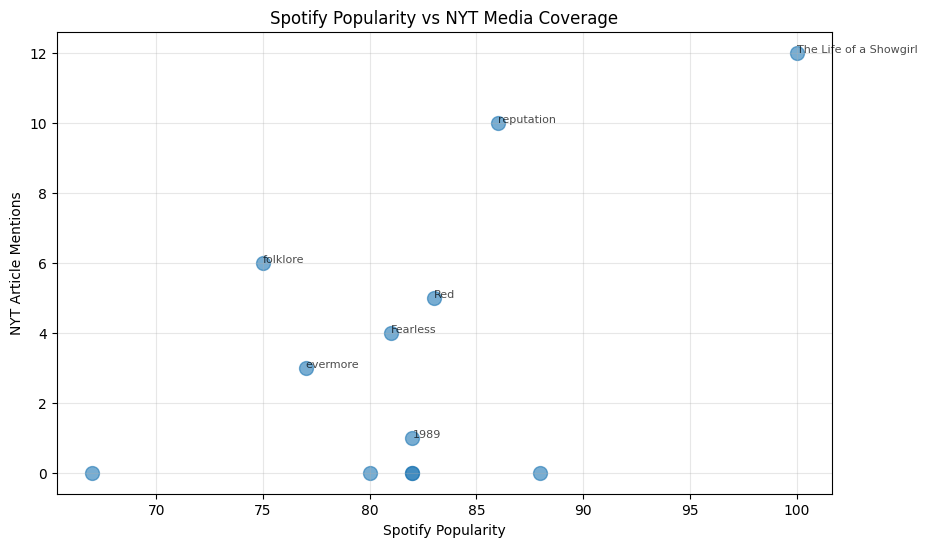

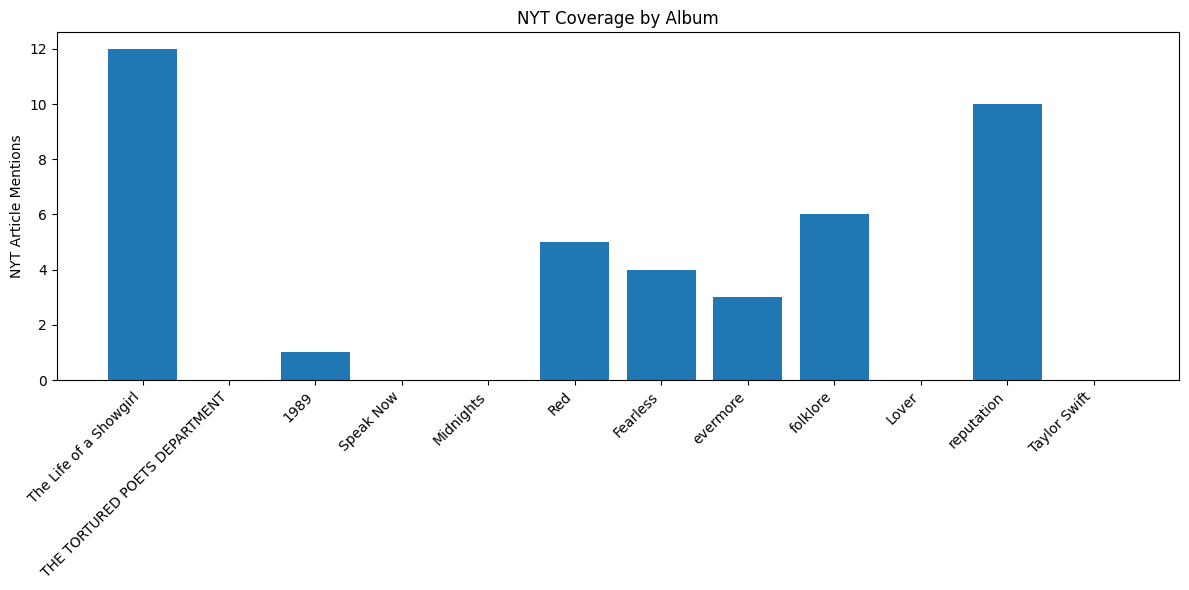

In [177]:
import matplotlib.pyplot as plt

# Merge mentions with album data
df_viz = df_albums[['base_title', 'release_date', 'popularity', 'is_rerecording']].drop_duplicates(subset=['base_title'])
df_viz = df_viz.merge(mentions, left_on='base_title', right_on='album_base_title', how='left')
df_viz['nyt_article_count'] = df_viz['nyt_article_count'].fillna(0)

# Plot 1: NYT Coverage vs Spotify Popularity
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['popularity'], df_viz['nyt_article_count'], s=100, alpha=0.6)
for _, row in df_viz.iterrows():
    if row['nyt_article_count'] > 0:
        plt.annotate(row['base_title'], (row['popularity'], row['nyt_article_count']), 
                     fontsize=8, alpha=0.7)
plt.xlabel('Spotify Popularity')
plt.ylabel('NYT Article Mentions')
plt.title('Spotify Popularity vs NYT Media Coverage')
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Coverage over time
df_viz['year'] = pd.to_datetime(df_viz['release_date']).dt.year
plt.figure(figsize=(12, 6))
plt.bar(df_viz['base_title'], df_viz['nyt_article_count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('NYT Article Mentions')
plt.title('NYT Coverage by Album')
plt.tight_layout()
plt.show()

In [178]:
# What type of coverage does each album get?
article_types = df_matched.groupby('album_base_title')['type_of_material'].value_counts()
print(article_types)

# When are albums mentioned (publication dates)?
df_matched['pub_year'] = pd.to_datetime(df_matched['pub_date']).dt.year
coverage_timeline = df_matched.groupby(['album_base_title', 'pub_year']).size()
print(coverage_timeline)

album_base_title        type_of_material
Midnights               News                5
The Life of a Showgirl  News                7
reputation              News                3
                        Review              1
Name: count, dtype: int64
album_base_title        pub_year
Midnights               2022        5
The Life of a Showgirl  2025        7
reputation              2017        2
                        2018        2
dtype: int64


In [179]:
# Do rerecordings get more or less coverage than originals?
df_viz['album_type'] = df_viz['is_rerecording'].map({True: 'Taylor\'s Version', False: 'Original'})
tv_analysis = df_viz.groupby('album_type')['nyt_article_count'].agg(['mean', 'sum', 'count'])
print("\nOriginal vs Taylor's Version Coverage:")
print(tv_analysis)


Original vs Taylor's Version Coverage:
                   mean   sum  count
album_type                          
Original          3.875  31.0      8
Taylor's Version  2.500  10.0      4


In [180]:
# Look at the actual headlines for each album
for album in mentions['album_base_title'][:5]:
    print(f"\n{album}:")
    album_articles = df_matched[df_matched['album_base_title'] == album]
    for _, art in album_articles.iterrows():
        print(f"  • {art['headline']}")
        print(f"    {art['pub_date'][:10]} - {art['type_of_material']}")


The Life of a Showgirl:
  • Anticipating Taylor Swift’s ‘The Life of a Showgirl’
    2025-08-18 - News
  • Why Is Taylor Swift So Polarizing? And Other Big ‘Showgirl’ Questions
    2025-10-10 - News
  • Breaking Down Taylor Swift’s ‘The Life of a Showgirl’
    2025-10-04 - News
  • Taylor Swift Conquered With the Eras Tour. Now Comes the Victory Lap.
    2025-10-02 - News
  • Taylor Swift Keeps Getting Bigger. Can the Music Keep Up?
    2025-10-06 - News
  • A Taylor Swift Mystery: Which Musso and Frank’s Booth Is ‘Best’?
    2025-10-08 - News
  • When Did You Know Taylor Swift Would Be a Pop Superstar?
    2025-09-30 - News

reputation:
  • Taylor Swift Begins Her ‘Reputation’ Tour, Taking on Foes and Her Old Self
    2018-05-09 - Review
  • Taylor Swift’s ‘Reputation’ Has Arrived. Let’s Discuss.
    2017-11-14 - News
  • Taylor Swift’s ‘Reputation’ Is Almost Here. Let’s Discuss.
    2017-11-09 - News
  • Taylor Swift’s ‘Reputation’ Takes Back No. 1 on the Chart
    2018-01-01 - News

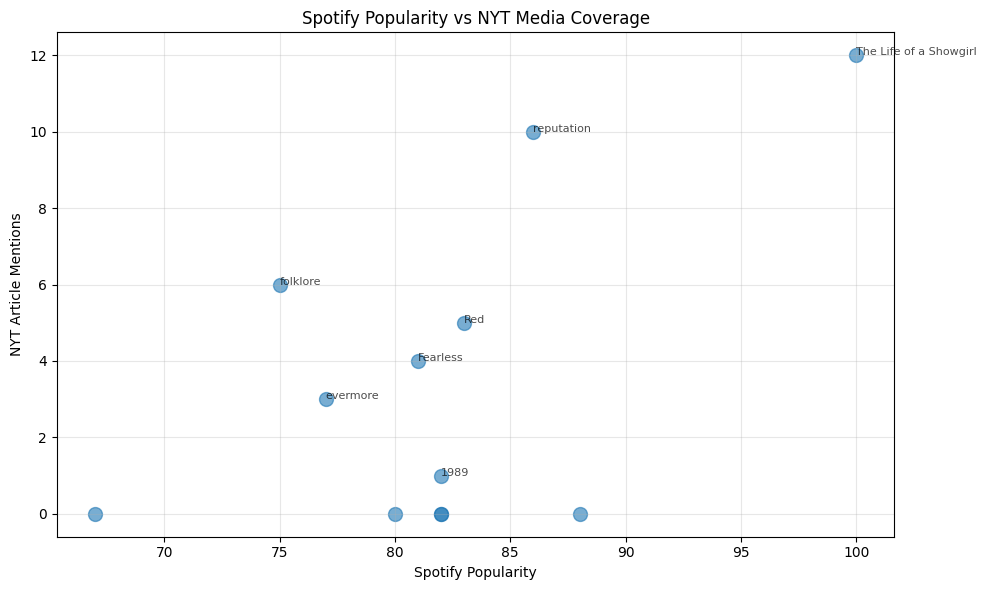

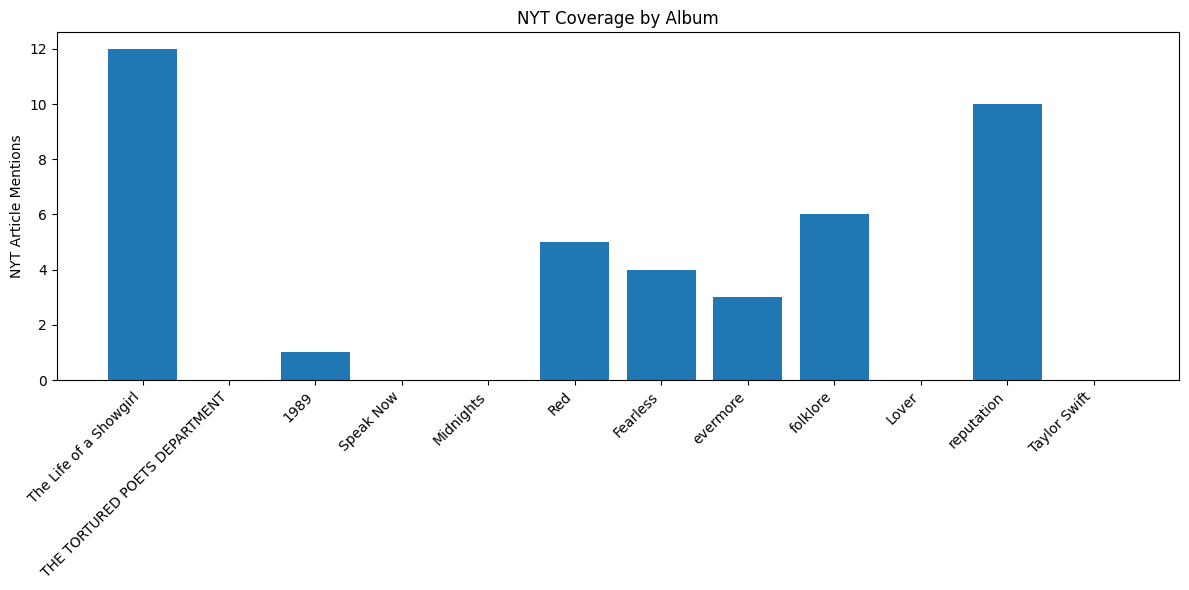

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot 1: NYT Coverage vs Spotify Popularity (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['popularity'], df_viz['nyt_article_count'], s=100, alpha=0.6)
for _, row in df_viz.iterrows():
    if row['nyt_article_count'] > 0:
        plt.annotate(row['base_title'], (row['popularity'], row['nyt_article_count']), 
                     fontsize=8, alpha=0.7)
plt.xlabel('Spotify Popularity')
plt.ylabel('NYT Article Mentions')
plt.title('Spotify Popularity vs NYT Media Coverage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spotify_vs_nyt_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Coverage by Album (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(df_viz['base_title'], df_viz['nyt_article_count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('NYT Article Mentions')
plt.title('NYT Coverage by Album')
plt.tight_layout()
plt.savefig('nyt_coverage_by_album.png', dpi=300, bbox_inches='tight')
plt.show()

In [186]:
# Check what's in your saved files
import pandas as pd

# Load what was saved
df_saved_analysis = pd.read_csv('album_analysis.csv')
df_saved_matches = pd.read_csv('album_article_matches.csv')

print("=== Saved Analysis File ===")
print(df_saved_analysis.head())
print(f"\nShape: {df_saved_analysis.shape}")
print(f"Columns: {df_saved_analysis.columns.tolist()}")

print("\n=== Saved Matches File ===")
print(df_saved_matches.head())
print(f"\nShape: {df_saved_matches.shape}")
print(f"Columns: {df_saved_matches.columns.tolist()}")

# Now create a COMPREHENSIVE combined dataset
# This includes ALL Spotify metadata + NYT coverage
df_final = df_albums[['id', 'name', 'base_title', 'album_type', 'total_tracks', 
                      'release_date', 'popularity', 'label', 'is_rerecording', 
                      'is_deluxe']].drop_duplicates(subset=['base_title'])

# Add NYT article counts
mentions = (
    df_matched.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
)

# Fix the combined dataset - remove the redundant column and fill missing values
df_final = df_albums[['id', 'name', 'base_title', 'album_type', 'total_tracks', 
                      'release_date', 'popularity', 'label', 'is_rerecording', 
                      'is_deluxe']].drop_duplicates(subset=['base_title'])

# Add NYT article counts
mentions = (
    df_matched.groupby("album_base_title")["web_url"]
    .nunique()
    .reset_index(name="nyt_article_count")
)

df_final = df_final.merge(
    mentions,
    left_on='base_title',
    right_on='album_base_title',
    how='left'
)

# Drop the redundant column and fill NaN values
df_final = df_final.drop(columns=['album_base_title'])  # Remove duplicate column
df_final['nyt_article_count'] = df_final['nyt_article_count'].fillna(0).astype(int)

# Add year for easier analysis
df_final['release_year'] = pd.to_datetime(df_final['release_date']).dt.year

# Sort by release date
df_final = df_final.sort_values('release_date').reset_index(drop=True)

print("=== CLEANED FINAL COMBINED DATASET ===")
print(df_final)

# Save the cleaned version
df_final.to_csv('taylor_swift_combined_analysis.csv', index=False)
print("\n✓ Saved cleaned version to: taylor_swift_combined_analysis.csv")

# Quick summary
print("\n=== SUMMARY ===")
print(f"Total albums: {len(df_final)}")
print(f"Albums with NYT coverage: {(df_final['nyt_article_count'] > 0).sum()}")
print(f"Total NYT articles matched: {df_final['nyt_article_count'].sum()}")
print(f"\nAlbums by NYT coverage:")
print(df_final[['base_title', 'release_year', 'popularity', 'nyt_article_count']].to_string(index=False))

=== Saved Analysis File ===
                      base_title release_date  popularity  is_rerecording  \
0         The Life of a Showgirl   2025-10-03         100           False   
1  THE TORTURED POETS DEPARTMENT   2024-04-18          82           False   
2                           1989   2023-10-26          82            True   
3                      Speak Now   2023-07-07          80            True   
4                      Midnights   2022-10-21          82           False   

         album_base_title  nyt_article_count  
0  The Life of a Showgirl                 12  
1                     NaN                  0  
2                    1989                  1  
3                     NaN                  0  
4                     NaN                  0  

Shape: (12, 6)
Columns: ['base_title', 'release_date', 'popularity', 'is_rerecording', 'album_base_title', 'nyt_article_count']

=== Saved Matches File ===
                 album_id              album_name        album_base_ti

In [187]:
# Create a clean Taylor Swift albums dataset
# This is your "canonical" album list with all metadata

ts_albums = df_final[[
    'id',
    'name', 
    'base_title',
    'release_date',
    'release_year',
    'album_type',
    'total_tracks',
    'popularity',
    'label',
    'is_rerecording',
    'is_deluxe',
    'nyt_article_count'
]].copy()

# Sort by release date
ts_albums = ts_albums.sort_values('release_date').reset_index(drop=True)

print("=== Taylor Swift Canonical Albums Dataset ===")
print(ts_albums)
print(f"\nTotal albums: {len(ts_albums)}")

# Save it
ts_albums.to_csv('ts_albums.csv', index=False)
print("\n✓ Saved to: ts_albums.csv")

# Quick stats
print("\n=== Quick Stats ===")
print(f"Original albums: {(~ts_albums['is_rerecording']).sum()}")
print(f"Taylor's Versions: {ts_albums['is_rerecording'].sum()}")
print(f"Deluxe editions: {ts_albums['is_deluxe'].sum()}")
print(f"Average popularity: {ts_albums['popularity'].mean():.1f}")
print(f"Albums with NYT coverage: {(ts_albums['nyt_article_count'] > 0).sum()}")

=== Taylor Swift Canonical Albums Dataset ===
                        id                           name  \
0   7mzrIsaAjnXihW3InKjlC3                   Taylor Swift   
1   6DEjYFkNZh67HP7R9PSZvv                     reputation   
2   1NAmidJlEaVgA3MpcPFYGq                          Lover   
3   1pzvBxYgT6OVwJLtHkrdQK      folklore (deluxe version)   
4   6AORtDjduMM3bupSWzbTSG      evermore (deluxe version)   
5   4hDok0OAJd57SGIT8xuWJH    Fearless (Taylor's Version)   
6   6kZ42qRrzov54LcAk4onW9         Red (Taylor's Version)   
7   151w1FgRZfnKZA9FEcg9Z3                      Midnights   
8   5AEDGbliTTfjOB8TSm1sxt   Speak Now (Taylor's Version)   
9   64LU4c1nfjz1t4VnGhagcg        1989 (Taylor's Version)   
10  1Mo4aZ8pdj6L1jx8zSwJnt  THE TORTURED POETS DEPARTMENT   
11  4a6NzYL1YHRUgx9e3YZI6I         The Life of a Showgirl   

                       base_title release_date  release_year album_type  \
0                    Taylor Swift   2006-10-24          2006      album   
1         

In [1]:
# Restart kernel first! (Kernel → Restart Kernel)

# Quick smoke test
from ts_media_bridge import SpotifyClient, NYTClient

sp = SpotifyClient()
nyt = NYTClient()

artist = sp.get_artist("06HL4z0CvFAxyc27GXpf02")
print(f"✓ Got artist: {artist['name']}")

df_albums = sp.get_artist_albums_df("06HL4z0CvFAxyc27GXpf02")
print(f"✓ Got {len(df_albums)} albums")
print(f"✓ Columns: {df_albums.columns.tolist()}")

print("🎉 Everything works!")

✓ Got artist: Taylor Swift
✓ Got 18 albums
✓ Columns: ['id', 'name', 'base_title', 'album_type', 'total_tracks', 'release_date', 'release_date_precision', 'popularity', 'label', 'genres', 'is_rerecording', 'is_deluxe', 'artists', 'external_urls.spotify']
🎉 Everything works!
